In [3]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep, time
from random import randint
from warnings import warn
from IPython.display import clear_output

In [22]:
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

pages = [str(i) for i in range(1, 5)]
years_url = [str(i) for i in range(2000, 2022)]
requests = 0
start_time = time()

for year in years_url:
    for page in pages:
        url = f'https://www.imdb.com/search/title?release_date={year}&sort=num_votes,desc&page={page}'
        response = get(url)

        # sleep(randint(2, 5))

        requests += 1
        elapsed_time = time() - start_time
        print(f'Request: {requests}; Frequency: {requests / elapsed_time} [requests/s]')
        clear_output(wait=True)

        if response.status_code != 200:
            warn(f'Request: {requests}; Status code: {response.status_code}')

        if requests > 88:
            warn('Number of requests was greater than expected.')
            break

        page_html = BeautifulSoup(response.text, 'html.parser')
        movie_containers = page_html.find_all('div', class_='lister-item mode-advanced')
        for container in movie_containers:
            if container.find('div', class_='ratings-metascore') is not None:
                name = container.h3.a.text
                names.append(name)

                movie_year = container.h3.find('span', class_='lister-item-year text-muted unbold').text
                years.append(movie_year)

                movie_imdb_rating = float(container.strong.text)
                imdb_ratings.append(movie_imdb_rating)

                movie_metascore_rating = int(container.find('span', class_='metascore').text)
                metascores.append(movie_metascore_rating)

                movie_votes = int(container.find('span', attrs={'name': 'nv'})['data-value'])
                votes.append(movie_votes)


Request: 88; Frequency: 0.46325212831593177 [requests/s]


In [23]:
df = pd.DataFrame(
    {
        'movie': names,
        'year': years,
        'imdb': imdb_ratings,
        'metascore': metascores,
        'votes': votes
    })
print(df)

                               movie    year  imdb  metascore    votes
0                          Гладиатор  (2000)   8.5         67  1502140
1                              Помни  (2000)   8.4         81  1240263
2                        Большой куш  (2000)   8.2         55   858721
3                   Реквием по мечте  (2000)   8.3         71   844622
4              Американский психопат  (2000)   7.6         64   624990
...                              ...     ...   ...        ...      ...
3847                       Дом Gucci  (2021)   6.6         59   137534
3848  CODA: Ребенок глухих родителей  (2021)   8.0         72   134518
3849                        Форсаж 9  (2021)   5.2         58   134045
3850                        Виновный  (2021)   6.3         63   127155
3851                           Время  (2021)   5.8         55   122232

[3852 rows x 5 columns]


In [24]:
df.loc[:, 'year'] = df['year'].str[-5:-1].astype(int)
df

,movie,year,imdb,metascore,votes
0,Гладиатор,2000,8.5,67,1502140
1,Помни,2000,8.4,81,1240263
2,Большой куш,2000,8.2,55,858721
3,Реквием по мечте,2000,8.3,71,844622
4,Американский психопат,2000,7.6,64,624990
...,...,...,...,...,...
3847,Дом Gucci,2021,6.6,59,137534
3848,CODA: Ребенок глухих родителей,2021,8.0,72,134518
3849,Форсаж 9,2021,5.2,58,134045
3850,Виновный,2021,6.3,63,127155


In [25]:
print(df.info())
df.describe().loc[['min', 'max'], ['imdb', 'metascore']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      3852 non-null   object 
 1   year       3852 non-null   int32  
 2   imdb       3852 non-null   float64
 3   metascore  3852 non-null   int64  
 4   votes      3852 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 135.5+ KB
None


,imdb,metascore
min,4.2,24.0
max,9.0,100.0


In [33]:
df['n_imdb'] = df['imdb'] * 10
df

,movie,year,imdb,metascore,votes,n_imdb
0,Гладиатор,2000,8.5,67,1502140,85.0
1,Помни,2000,8.4,81,1240263,84.0
2,Большой куш,2000,8.2,55,858721,82.0
3,Реквием по мечте,2000,8.3,71,844622,83.0
4,Американский психопат,2000,7.6,64,624990,76.0
...,...,...,...,...,...,...
3847,Дом Gucci,2021,6.6,59,137534,66.0
3848,CODA: Ребенок глухих родителей,2021,8.0,72,134518,80.0
3849,Форсаж 9,2021,5.2,58,134045,52.0
3850,Виновный,2021,6.3,63,127155,63.0


In [27]:
import matplotlib.pyplot as plt

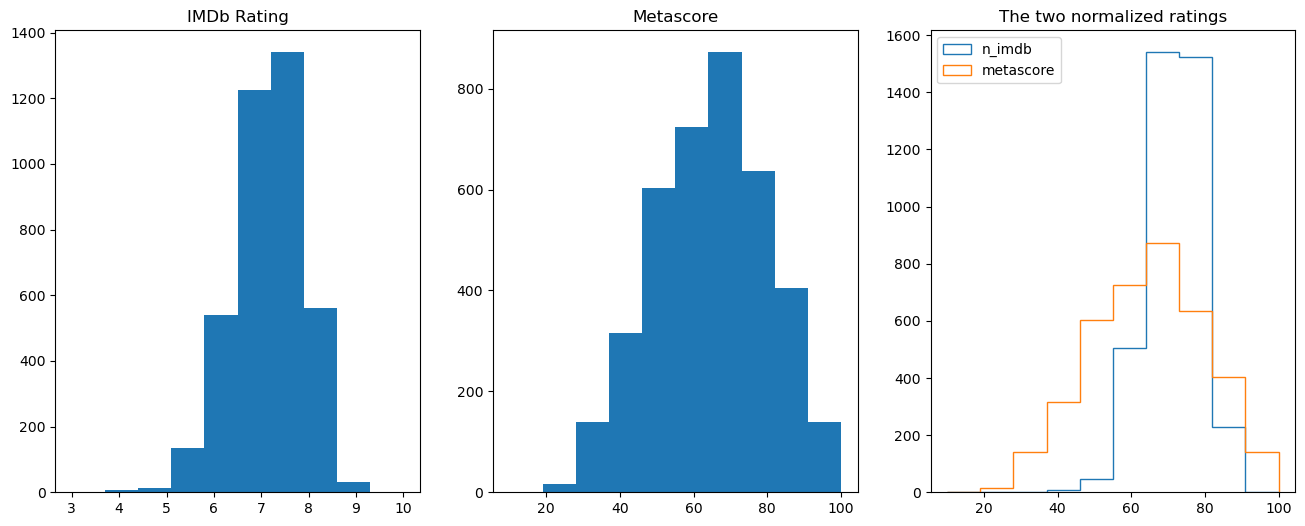

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
ax1, ax2, ax3 = fig.axes

ax1.hist(df['imdb'], bins=10, range=(3, 10))
ax1.set_title('IMDb Rating')

ax2.hist(df['metascore'], bins=10, range=(10, 100))
ax2.set_title('Metascore')

ax3.hist(df['n_imdb'], bins=10, range=(10, 100), histtype='step', label='n_imdb')
ax3.hist(df['metascore'], bins=10, range=(10, 100), histtype='step', label='metascore')
ax3.legend(loc='upper left')
ax3.set_title('The two normalized ratings')

plt.show()